Victor Ramirez

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people, load_digits

sk_data = load_digits()


Loading in the data...

In [2]:
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names


n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

In [3]:
print("Number of samples: {}; Number of features: {}; Number of classes: {}; Shape: {}; {} x {}".format
      (n_samples,n_features,n_classes, N,h,w))

Number of samples: 1797; Number of features: 64; Number of classes: 10; Shape: 1797; 8 x 8


1. **n_samples:** Total number of images in the digits dataset. 
2. **n_features:**: Number of points; each point is measure din some gray scale 
3. **n_classes:**: Number of different numbers we have, 0-9
4. **N:**: The number of images produced 
5. **h:** Height
6. **w:** Width


Displaying the digits

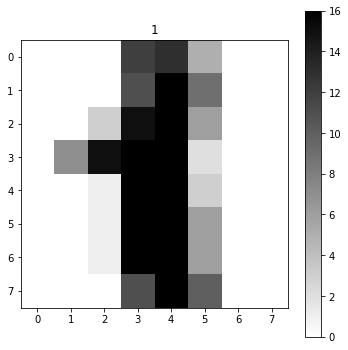

In [4]:
plt.figure(1, figsize=(6, 6))
plt.imshow(sk_data.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.colorbar()
plt.title(sk_data.target[1])
#plt.show()
#plt.savefig("sample_digit.png")

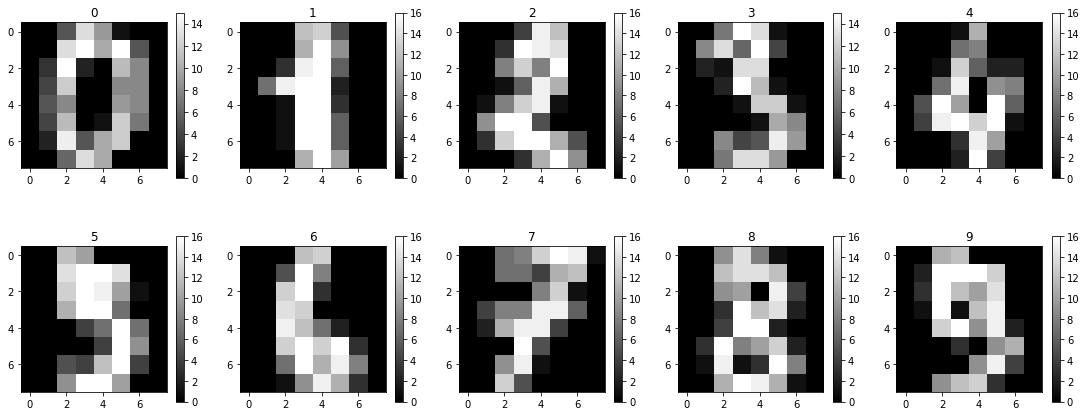

In [5]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(3 * n_col, 3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        #plt.xticks(())
        #plt.yticks(())
        plt.colorbar()
        
    #plt.savefig("sample_digits.png")

    
plot_gallery(sk_data.images, sk_data.target, h,w)

#plt.figure(1, figsize=(6, 6))
#plt.imshow(sk_data.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
#plt.colorbar()
#plt.title(sk_data.target[1])
#plt.show()


In [6]:
from ipywidgets import interact

def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

In [7]:
browse_images(sk_data.images, sk_data.target, sk_data.target_names)


In [8]:
### Generate point cloud for first digit matrix
### I set the cut-off to 5 so I can read all data sets.
#P_1 = []#np.zeros((h*w,2))
label_1 = sk_data.target[1]
digit_1 = sk_data.images[1]
print(digit_1)

def pixel_point_cloud(digit_matrix, threshold = 1):
    P = []
    for row in range(h):
        for col in range(w):
            if digit_matrix[row][col] >= threshold:
                P.append((row,col))
                
    return np.array(P)

P_1 = pixel_point_cloud(digit_1, threshold = 5)
P_1

[[  0.   0.   0.  12.  13.   5.   0.   0.]
 [  0.   0.   0.  11.  16.   9.   0.   0.]
 [  0.   0.   3.  15.  16.   6.   0.   0.]
 [  0.   7.  15.  16.  16.   2.   0.   0.]
 [  0.   0.   1.  16.  16.   3.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   0.  11.  16.  10.   0.   0.]]


array([[0, 3],
       [0, 4],
       [0, 5],
       [1, 3],
       [1, 4],
       [1, 5],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 3],
       [4, 4],
       [5, 3],
       [5, 4],
       [5, 5],
       [6, 3],
       [6, 4],
       [6, 5],
       [7, 3],
       [7, 4],
       [7, 5]])

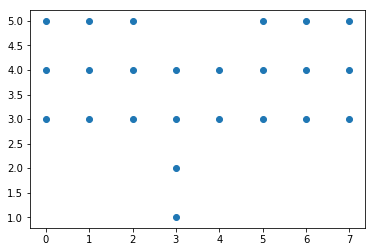

In [9]:
x,y = zip(*P_1)
plt.scatter(x,y)

In [10]:
import sys, os
os.environ['PATH']+= ':/home/ramir193/ripser/'
sys.path.append('/home/ramir193/teaspoon/')
import teaspoon.TDA.Persistence as pP
import teaspoon.MakeData.PointCloud as gPC
import teaspoon.TDA.Draw as Draw

In [11]:
D_1 = pP.VR_Ripser(P_1,1)
pd_0d_1 = D_1[0]
pd_1d_1 = D_1[1]
pd_0d_1_lst = list(pd_0d_1)
pd_1d_1_lst = list(pd_1d_1)


In [12]:
lifetime_1 = pd_1d_1[:,1] - pd_1d_1[:,0]
lifetime_1

array([ 0.41421,  0.41421,  0.41421,  0.41421,  0.41421,  0.41421,
        0.41421,  0.41421,  0.41421,  0.41421,  0.41421])

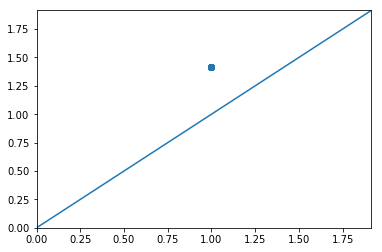

In [13]:
Draw.drawDgm(pd_1d_1)

In [14]:
D_1_df = pd.DataFrame([[label_1,pd_0d_1,pd_1d_1,lifetime_1]],columns=["label", "0-D", "1-D", "Lifetimes"])

D_1_df

,label,0-D,1-D,Lifetimes
0,1,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0...","[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...","[0.41421, 0.41421, 0.41421, 0.41421, 0.41421, ..."


In [15]:
### Generate homology info for each digit ###
n = n_samples
labels = sk_data.target[:n]
digits = sk_data.images[:n]
digit_clouds = []
rows = []
column_names = ["label",  "PD 1-D", "Max Lifetimes 1-D"]
for i in range(n):
    try:
        digit = digits[i]
        P = pixel_point_cloud(digit, threshold = 5)
        digit_clouds.append(P)
        persistence_diagrams = pP.VR_Ripser(P,1)
        pd_1d = persistence_diagrams[1]
        max_lifetime_1d = max(pd_1d[:,1] - pd_1d[:,0])
        rows.append([labels[i],pd_1d,max_lifetime_1d])
    except IndexError:
        continue

persistence_df = pd.DataFrame(rows, columns = column_names)
persistence_df.head(10)

,label,PD 1-D,Max Lifetimes 1-D
0,0,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 3.16228...",2.16228
1,1,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421
2,2,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421
3,3,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421
4,4,"[[1.41421, 2.23607], [1.0, 1.41421], [1.0, 1.4...",0.82186
5,5,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421
6,6,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421
7,7,"[[2.0, 2.23607], [1.41421, 2.0], [1.0, 1.41421...",0.58579
8,8,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",1.23607
9,9,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",1.00000


#### Compute Carlsson coordinates


In [16]:

def f_1(x,y):
    return np.sum(x*(y-x))

def f_2(x,y):
    y_max = max(y)
    return np.sum((y_max-y)*(y-x))

def f_3(x,y):
    return np.sum(x**2*(y-x)**4)
    
def f_4(x,y):
    y_max = max(y)
    return np.sum((y_max-y)**2*(y-x)**4)
                  
    
coordinates = []
sample_dgms = persistence_df['PD 1-D']
for i in range(n):
    dgm = sample_dgms[i]
    x,y = zip(*dgm)
    x = np.array(x)
    y = np.array(y)
    coordinates.append([f_1(x,y),f_2(x,y),f_3(x,y),f_4(x,y)])

coordinates_df = pd.DataFrame(coordinates, columns=['f1','f2','f3','f4'],dtype='float')
persistence_df = pd.concat([persistence_df,coordinates_df],axis=1)
persistence_df.head(10)


,label,PD 1-D,Max Lifetimes 1-D,f1,f2,f3,f4
0,0,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 3.16228...",2.16228,5.475960,5.792545,22.095367,0.719598
1,1,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421,4.556310,0.000000,0.323799,0.000000
2,2,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421,4.970520,0.000000,0.353235,0.000000
3,3,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421,2.485260,0.000000,0.176617,0.000000
4,4,"[[1.41421, 2.23607], [1.0, 1.41421], [1.0, 1.4...",0.82186,3.233333,1.702113,1.059652,0.099414
5,5,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421,4.142100,0.000000,0.294362,0.000000
6,6,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",0.41421,4.556310,0.000000,0.323799,0.000000
7,7,"[[2.0, 2.23607], [1.41421, 2.0], [1.0, 1.41421...",0.58579,4.200040,2.521246,0.453979,0.145742
8,8,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",1.23607,4.307120,1.938183,3.481565,0.155143
9,9,"[[1.0, 1.41421], [1.0, 1.41421], [1.0, 1.41421...",1.00000,3.485260,1.455840,1.176617,0.060606


### Machine Learning using SVM

#### Features = Carlsson Coordinates

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = persistence_df.filter(regex='f[1-4]')
y = persistence_df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1349)

lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
score = lin_clf.score(X_test,y_test)


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


print(classification_report(y_test, y_pred))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.90      0.93      0.91        28
          1       0.29      0.81      0.43        42
          2       0.14      0.14      0.14        36
          3       0.21      0.11      0.14        37
          4       0.00      0.00      0.00        38
          5       0.12      0.03      0.05        36
          6       0.47      0.51      0.49        39
          7       0.28      0.52      0.36        31
          8       0.43      0.40      0.42        40
          9       0.60      0.27      0.37        33

avg / total       0.33      0.36      0.32       360

Confusion matrix:
[[26  0  0  0  0  0  0  0  2  0]
 [ 0 34  7  0  0  0  0  0  1  0]
 [ 0 18  5  4  0  0  1  7  1  0]
 [ 0 11  6  4  0  2  0 12  1  1]
 [ 1  6  4  5  0  1  2 12  7  0]
 [ 0 14  5  3  0  1  0  8  0  5]
 [ 1 12  1  1  0  1 20  0  3  0]
 [ 0  7  5  0  0  1  1 16  1  0]
 [ 1  8  0  1  0  0 12  2 16  0]
 [ 0  6  2  1  0  2  7  1  5  9]]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred)
x = np.arange(0,10)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


([<matplotlib.axis.XTick at 0x7f3b604c5128>,
 <a list of 10 Text xticklabel objects>)

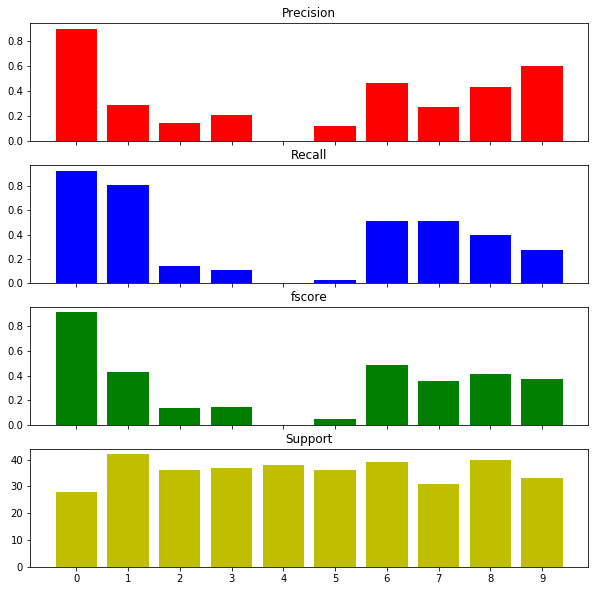

In [22]:

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize=(10,10))
ax1.bar(x, precision, color='r')
ax1.set_title('Precision')
ax2.bar(x, recall, color = 'b')
ax2.set_title('Recall')
ax3.bar(x, fscore, color = 'g')
ax3.set_title('fscore')
ax4.bar(x, support, color='y')
ax4.set_title('Support')
plt.xticks(x)


Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        28
          1       0.93      0.90      0.92        42
          2       0.97      0.94      0.96        36
          3       0.97      0.84      0.90        37
          4       1.00      0.95      0.97        38
          5       0.95      1.00      0.97        36
          6       0.97      0.95      0.96        39
          7       1.00      0.94      0.97        31
          8       0.83      0.95      0.88        40
          9       0.89      1.00      0.94        33

avg / total       0.95      0.94      0.94       360


Confusion matrix:
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  1  0  0  0  0  3  0]
 [ 0  1 34  0  0  0  0 

([<matplotlib.axis.XTick at 0x7f3b60224320>,
 <a list of 10 Text xticklabel objects>)

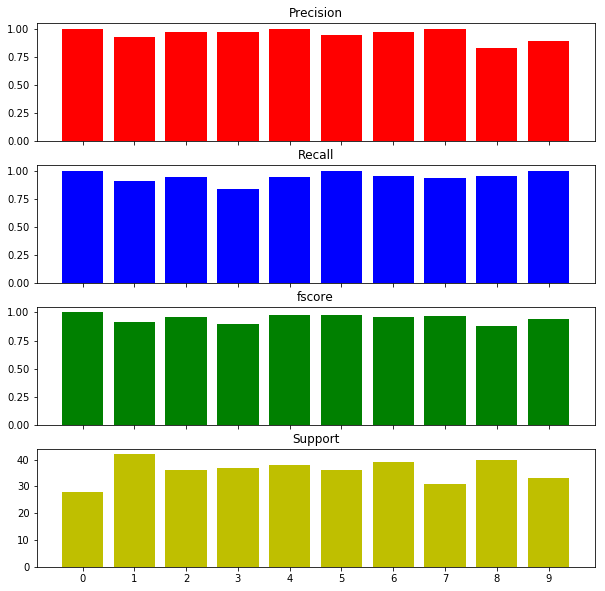

In [23]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
# for index, (image, label) in enumerate(images_and_labels[:4]):
#     plt.subplot(2, 4, index + 1)
#     plt.axis('off')
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
#n_samples = len(digits.images)
X = digits.images.reshape((n, -1))
y = persistence_df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1349)

# Create a classifier: a support vector classifier
#classifier = svm.SVC(gamma=0.001)
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)

# Now predict the value of the digit
y_pred = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred)
x = np.arange(0,10)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize=(10,10))
ax1.bar(x, precision, color='r')
ax1.set_title('Precision')
ax2.bar(x, recall, color = 'b')
ax2.set_title('Recall')
ax3.bar(x, fscore, color = 'g')
ax3.set_title('fscore')
ax4.bar(x, support, color='y')
ax4.set_title('Support')
plt.xticks(x)

# End of Project Notebook. Below is scratch code

Let's have a look at the repartition among target classes:

In [ ]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(class_labels)
counts = [(class_labels == i).sum() for i in y_unique]

plt.xticks(y_unique,  categories[y_unique])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

## Step B: Splitting the dataset for model development and then evaluation

Let's split the data in a development set and final evaluation set.

In [ ]:
from sklearn.cross_validation import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)
print(len(train_vectors))
print(len(test_vectors))

&#9989; Do This - As a group and then as a class. Discuss why we need to separate our samples into a training and testing set. 

## Step C: Calculate PCA transform and select feature subset. 

To train a model we will first reduce the dimensionality of the original picture to a 4 PCA space. This is often called unsupervised feature extraction.

In [ ]:
from sklearn.decomposition import RandomizedPCA

n_components = 4 # This is much less than the original n_features

print("Extracting the top %d eigenfaces from %d faces" % (
    n_components, train_vectors.shape[0]))

pca = RandomizedPCA(n_components=n_components, whiten=True)

%time pca.fit(train_vectors)

eigenfaces = pca.components_.reshape((n_components, h, w))

In [ ]:
pca.components_.shape

Notice that the length of these new vectors are the same size as the original data. Let's plot the gallery of the most significant eigenfaces:

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=1, n_col=4)

## Step D: transform the training and testing sets into the new feature space

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

train_pca = pca.transform(train_vectors)
test_pca = pca.transform(test_vectors)


print("Training set changed from a size of: ", train_vectors.shape, ' to: ', train_pca.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', test_pca.shape)

## Step E: Train an SVM Classifier based on the training dataset.

In [ ]:
###############################################################################
# Train a SVM classification model

#make some temporary variablse so you can change this easily
tmp_vectors = train_pca
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

## Step F: Show the results of the classification on the testing dataset.

In [ ]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

#make some temporary variablse so you can change this easily
predict_vectors = test_pca
true_lables = test_labels

print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))


In [ ]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title([true_titles[i],pred_titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)